[ 3.53553391e-01+0.00000000e+00j -2.50000000e-01-2.50000000e-01j
  2.16489014e-17+3.53553391e-01j  2.50000000e-01-2.50000000e-01j
 -3.53553391e-01+4.32978028e-17j  2.50000000e-01+2.50000000e-01j
 -6.49467042e-17-3.53553391e-01j -2.50000000e-01+2.50000000e-01j] [ 3.53553391e-01+0.00000000e+00j -2.50000000e-01-2.50000000e-01j
  3.92523115e-16+3.53553391e-01j  2.50000000e-01-2.50000000e-01j
 -3.53553391e-01+7.85046229e-16j  2.50000000e-01+2.50000000e-01j
 -1.17756934e-15-3.53553391e-01j -2.50000000e-01+2.50000000e-01j] True
 ------- 
[ 3.53553391e-01+0.00000000e+00j  2.50000000e-01-2.50000000e-01j
 -6.49467042e-17-3.53553391e-01j -2.50000000e-01-2.50000000e-01j
 -3.53553391e-01+4.32978028e-17j -2.50000000e-01+2.50000000e-01j
  1.08244507e-16+3.53553391e-01j  2.50000000e-01+2.50000000e-01j] [ 3.53553391e-01+0.00000000e+00j  2.50000000e-01-2.50000000e-01j
 -5.49532361e-16-3.53553391e-01j -2.50000000e-01-2.50000000e-01j
 -3.53553391e-01+1.09906472e-15j -2.50000000e-01+2.50000000e-01j
  1.648

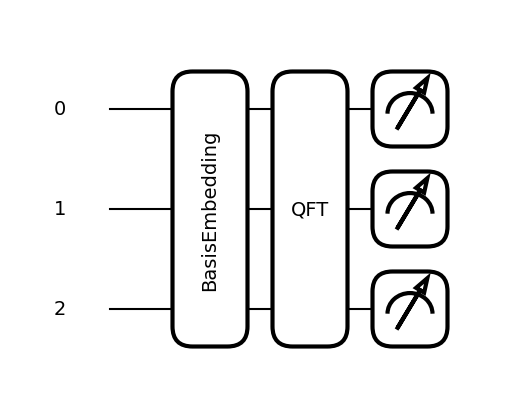

In [53]:
import pennylane as qml 
import numpy as np 

wires_a = [0,1,2]
wires_b = [3,4,5]

dev = qml.device('default.qubit', wires=wires_a)

@qml.qnode(dev)
def circuit(i):
    qml.BasisEmbedding([int(i) for i in bin(i)[2:]], wires=wires_a)
    qml.QFT(wires=[0,1,2])
    return qml.state()

state_7 = circuit(7)
qml.draw_mpl(circuit)(7)

ket_0 = np.array([1,0])[np.newaxis]
ket_1 = np.array([0,1])[np.newaxis]

def arr(phase):
    q = ket_0.T + phase * ket_1.T
    return q

Q1 = (arr(np.cos(14*np.pi/8) + 1j*np.sin(14*np.pi/8)))
Q2 = (arr(np.cos(6*np.pi/4) + 1j*np.sin(6*np.pi/4)))
Q3 = (arr(np.cos(np.pi) + 1j*np.sin(np.pi)))

s_7 = ((np.outer(np.outer(Q3, Q2), Q1))/np.sqrt(8)).flatten()

Q1 = (arr(np.cos(10*np.pi/8) + 1j*np.sin(10*np.pi/8)))
Q2 = (arr(np.cos(2*np.pi/4) + 1j*np.sin(2*np.pi/4)))
Q3 = (arr(np.cos(np.pi) + 1j*np.sin(np.pi)))

s_5 = ((np.outer(np.outer(Q3, Q2), Q1))/np.sqrt(8)).flatten()

state_5 = circuit(5)

print (s_5, state_5, np.allclose(s_5, state_5, rtol=0.000000001))
print(' ------- ')
print (s_7, state_7, np.allclose(s_7, state_7, rtol=0.000000001))


(<Figure size 700x400 with 1 Axes>, <Axes: >)

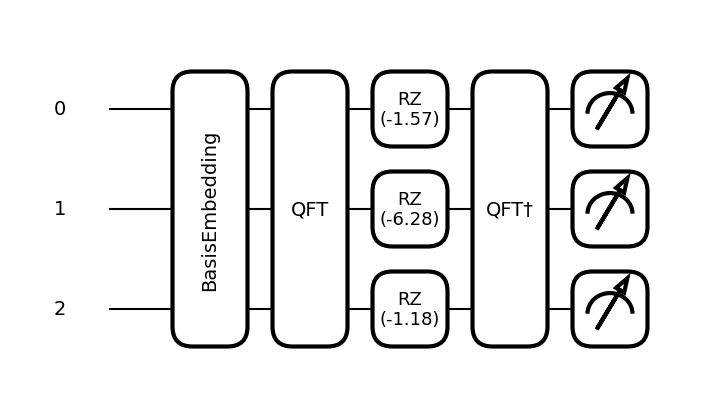

In [89]:
@qml.qnode(dev)
def circuit_diff(i):
    qml.BasisEmbedding([int(i) for i in format(0, "#05b")[2:]], wires=wires_a)
    qml.QFT(wires=[0,1,2])
    
    qml.RZ(-3*np.pi/8, wires=0)
    qml.RZ(-2*np.pi, wires=1)
    qml.RZ(-np.pi/2, wires=2)

    qml.adjoint(qml.QFT)(wires=[0,1,2])

    return qml.probs()

qml.draw_mpl(circuit_diff, decimals=2)(0)


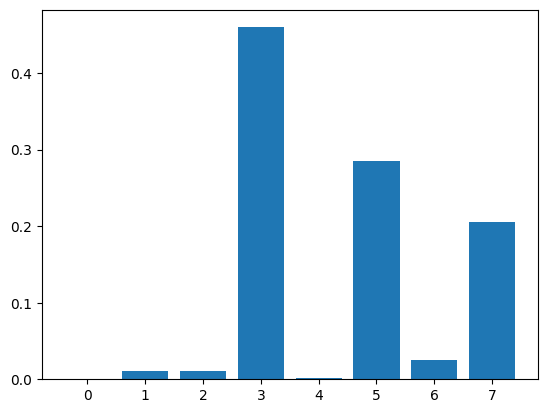

In [86]:
import matplotlib.pyplot as plt
import numpy as np

x = range(8)
y = circuit_diff(7)

plt.bar(x,y)
plt.show()